In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_rows', None)
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./datasets/cleaned.csv")
df_test = pd.read_csv("./datasets/cleaned_test.csv")
df.head()

Unnamed: 0   id        pid  ms_subclass  lot_frontage  lot_area  \
0           0  109  533352170           60          68.0     13517   
1           1  544  531379050           60          43.0     11492   
2           2  153  535304180           20          68.0      7922   
3           3  318  916386060           60          73.0      9802   
4           4  255  906425045           50          82.0     14235   

   overall_qual  overall_cond  year_built  year_remod/add  ...  central_air  \
0             6             8        1976            2005  ...            Y   
1             7             5        1996            1997  ...            Y   
2             5             7        1953            2007  ...            Y   
3             5             5        2006            2007  ...            Y   
4             6             8        1900            1993  ...            Y   

   electrical  kitchen_qual  functional  garage_type  garage_finish  \
0       SBrkr            Gd         Typ       Attchd            RFn   
1       SBrkr            Gd         Typ       Attchd            RFn   
2       SBrkr            Gd         Typ       Detchd            Unf   
3       SBrkr            TA         Typ      BuiltIn            Fin   
4       SBrkr            TA         Typ       Detchd            Unf   

   garage_qual  garage_cond  paved_drive  sale_type  
0           TA           TA            Y        WD   
1           TA           TA            Y        WD   
2           TA           TA            Y        WD   
3           TA           TA            Y        WD   
4           TA           TA            N        WD   

[5 rows x 77 columns]

In [3]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

id        pid  ms_subclass  lot_frontage  lot_area  overall_qual  \
0  109  533352170           60          68.0     13517             6   
1  544  531379050           60          43.0     11492             7   
2  153  535304180           20          68.0      7922             5   
3  318  916386060           60          73.0      9802             5   
4  255  906425045           50          82.0     14235             6   

   overall_cond  year_built  year_remod/add  mas_vnr_area  ...  central_air  \
0             8        1976            2005         289.0  ...            Y   
1             5        1996            1997         132.0  ...            Y   
2             7        1953            2007           0.0  ...            Y   
3             5        2006            2007           0.0  ...            Y   
4             8        1900            1993           0.0  ...            Y   

   electrical  kitchen_qual  functional  garage_type  garage_finish  \
0       SBrkr            Gd         Typ       Attchd            RFn   
1       SBrkr            Gd         Typ       Attchd            RFn   
2       SBrkr            Gd         Typ       Detchd            Unf   
3       SBrkr            TA         Typ      BuiltIn            Fin   
4       SBrkr            TA         Typ       Detchd            Unf   

   garage_qual  garage_cond  paved_drive  sale_type  
0           TA           TA            Y        WD   
1           TA           TA            Y        WD   
2           TA           TA            Y        WD   
3           TA           TA            Y        WD   
4           TA           TA            N        WD   

[5 rows x 76 columns]

In [4]:
df_test.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

id        pid  ms_subclass  lot_frontage  lot_area  overall_qual  \
0  109  533352170           60          68.0     13517             6   
1  544  531379050           60          43.0     11492             7   
2  153  535304180           20          68.0      7922             5   
3  318  916386060           60          73.0      9802             5   
4  255  906425045           50          82.0     14235             6   

   overall_cond  year_built  year_remod/add  mas_vnr_area  ...  central_air  \
0             8        1976            2005         289.0  ...            Y   
1             5        1996            1997         132.0  ...            Y   
2             7        1953            2007           0.0  ...            Y   
3             5        2006            2007           0.0  ...            Y   
4             8        1900            1993           0.0  ...            Y   

   electrical  kitchen_qual  functional  garage_type  garage_finish  \
0       SBrkr            Gd         Typ       Attchd            RFn   
1       SBrkr            Gd         Typ       Attchd            RFn   
2       SBrkr            Gd         Typ       Detchd            Unf   
3       SBrkr            TA         Typ      BuiltIn            Fin   
4       SBrkr            TA         Typ       Detchd            Unf   

   garage_qual  garage_cond  paved_drive  sale_type  
0           TA           TA            Y        WD   
1           TA           TA            Y        WD   
2           TA           TA            Y        WD   
3           TA           TA            Y        WD   
4           TA           TA            N        WD   

[5 rows x 76 columns]

In [5]:
num_data = df.select_dtypes('number').drop(columns = ['id', 'pid'],
                                          axis = 1)

In [6]:
num_data.head(2)

ms_subclass  lot_frontage  lot_area  overall_qual  overall_cond  \
0           60          68.0     13517             6             8   
1           60          43.0     11492             7             5   

   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  ...  \
0        1976            2005         289.0         533.0           0.0  ...   
1        1996            1997         132.0         637.0           0.0  ...   

   wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   

   pool_area  misc_val  mo_sold  yr_sold  saleprice  
0          0         0        3     2010     130500  
1          0         0        4     2009     220000  

[2 rows x 37 columns]

In [7]:
plt.figure(figsize = (100,90))
sns.heatmap(num_data.corr().sort_values(by = 
                                        'saleprice', 
                                        ascending = False ),
            square = True, annot = True, vmin = -1, vmax = 1,
            linewidths = 2,cmap = 'Greens', cbar = False,
            center = 0, annot_kws ={'fontsize':20},
            linecolor = 'black')
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16, rotation  = 60);

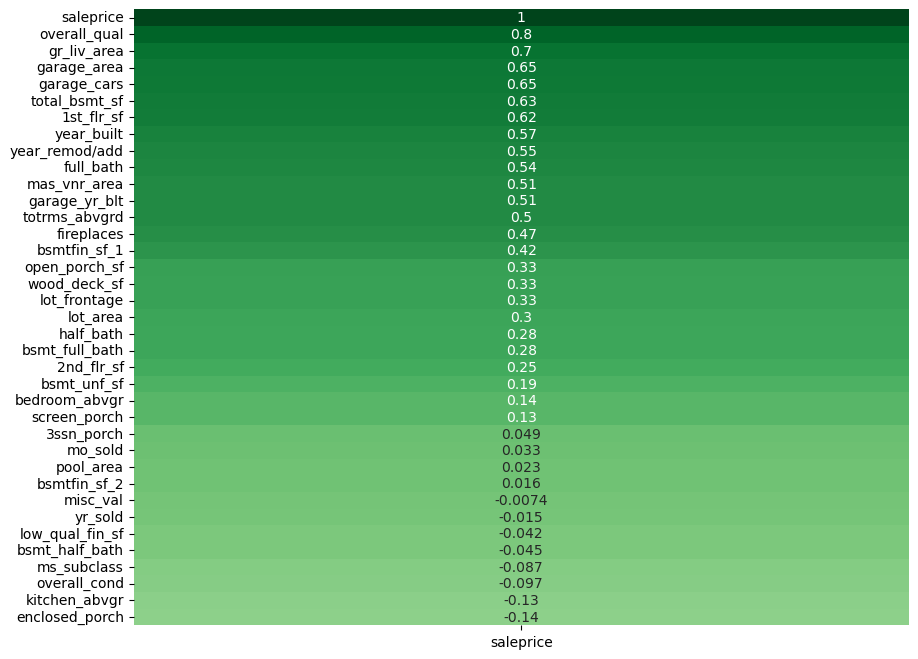

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(num_data.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), 
            annot=True, cbar = False,
           vmin=-1,
           vmax=1,
           cmap = 'Greens');

In [9]:
#Checking higly correlated numerical columns with saleprice
high_corr = num_data.corr()[["saleprice"]].sort_values(by = 
                                                       "saleprice",
                                        ascending = False).head(8)

In [10]:
col_list = list(high_corr.index)
col_list

['saleprice',
 'overall_qual',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'year_built']

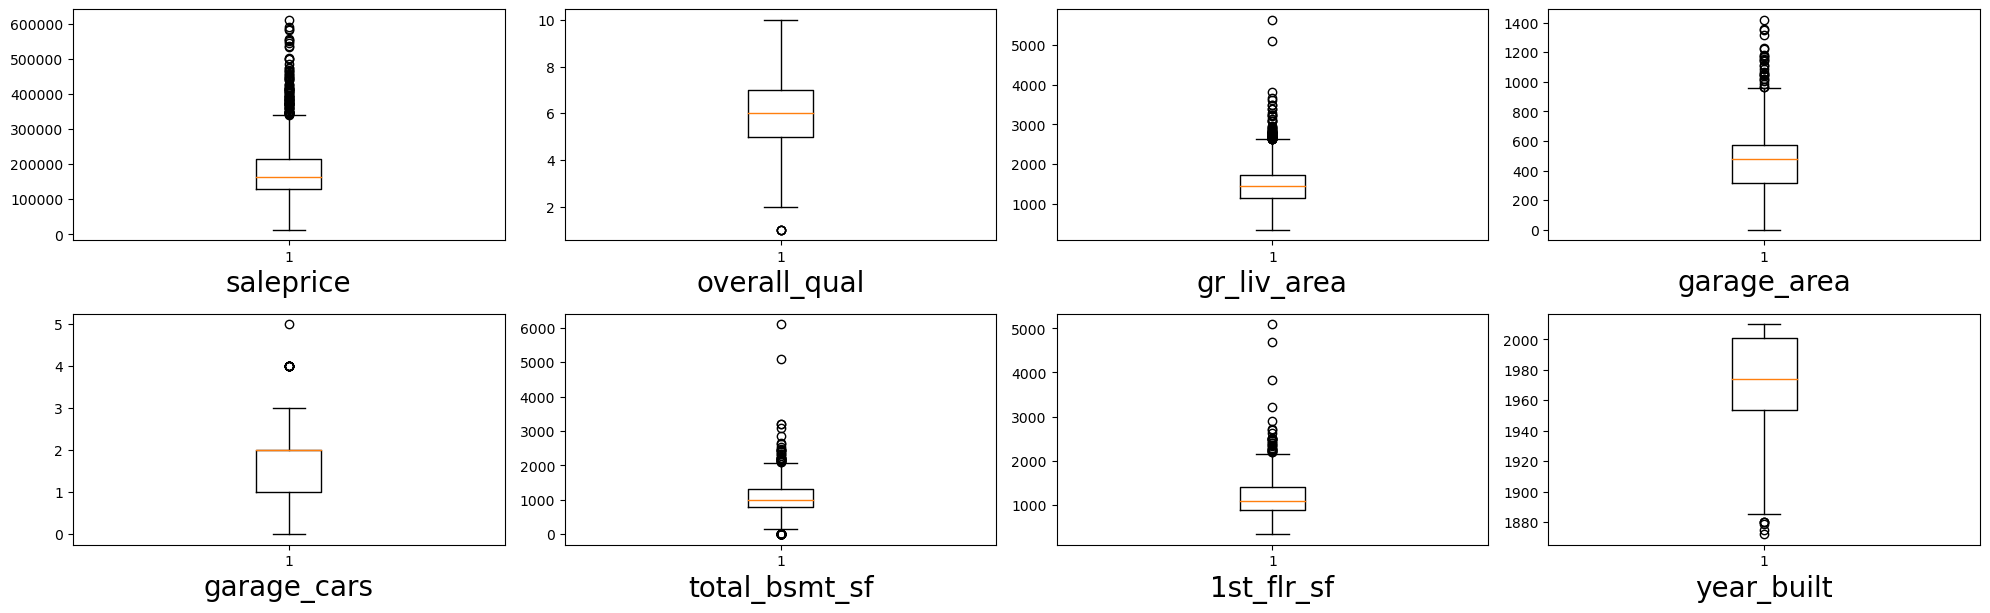

In [11]:
plt.figure(figsize = (20,30))
for index, col in enumerate(col_list):
    plt.subplot(10,4, index+1)
    plt.boxplot(num_data[col])
    plt.xlabel(col, fontsize = 20)
plt.tight_layout()

In [12]:
num_data['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

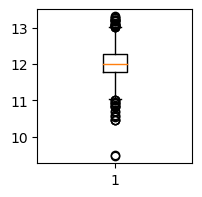

In [13]:
plt.figure(figsize = (2,2))
plt.boxplot(np.log(num_data['saleprice']));

- log transformation of saleprice does not remove outliers

In [37]:
sns.set_style('dark')
sns.color_palette("dark:#5A9_r", as_cmap=True)
sns.distplot(num_data['saleprice'], color = 
             'darkblue', bins = 30)
plt.xlabel("Saleprice")
plt.title('Normality check of dependent variable Saleprice');

TypeError: distplot() got an unexpected keyword argument 'edgecolor'

- Log transformation of saleprice doesnot remove outliers

In [15]:
num_data['gr_liv_area'].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: gr_liv_area, dtype: float64

In [16]:
#Removing outliers
num_data['gr_liv_area'] = np.where(num_data['gr_liv_area'] > 2000,
                                  2000, num_data['gr_liv_area'])

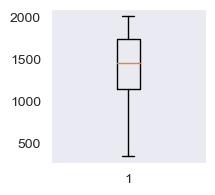

In [17]:
# We can see below that there are no outliers
plt.figure(figsize = (2,2))
plt.boxplot(num_data['gr_liv_area']);

In [18]:
num_data['garage_area'].describe()

count    2051.000000
mean      473.509020
std       216.007577
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: garage_area, dtype: float64

In [19]:
#Removing outliers in garage area by capping at 75% (576)
num_data['garage_area'] = np.where(num_data['garage_area'] > 576,
                                  576, num_data['garage_area'])

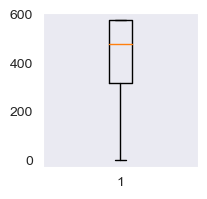

In [20]:
plt.figure(figsize = (2,2))
plt.boxplot(num_data['garage_area']);

In [21]:
num_data['1st_flr_sf'].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st_flr_sf, dtype: float64

In [22]:
#Removing outliers in 1st_flr_sf by capping at 75% which is 1405
num_data['1st_flr_sf'] = np.where(num_data['1st_flr_sf'] > 1405, 
                                  1405, (num_data['1st_flr_sf']))

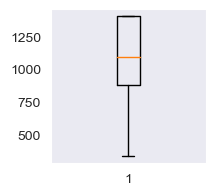

In [23]:
plt.figure(figsize = (2,2))
plt.boxplot(num_data['1st_flr_sf']);

In [24]:
num_data['total_bsmt_sf'].describe()

count    2051.000000
mean     1057.916382
std       449.312721
min         0.000000
25%       793.000000
50%       994.000000
75%      1318.500000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

In [25]:
#Removing outliers in total_bsmt_sf by capping at 75% which is 1318
num_data['total_bsmt_sf'] = np.where(num_data['total_bsmt_sf'] > 1318, 
                                  1318, (num_data['total_bsmt_sf']))

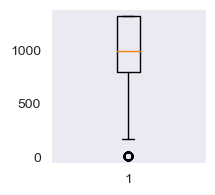

In [26]:
plt.figure(figsize = (2,2))
plt.boxplot(num_data['total_bsmt_sf']);

In [27]:
#Replacing zero with mean
num_data['total_bsmt_sf']  = num_data['total_bsmt_sf'].replace(0, num_data['total_bsmt_sf'].mean())

In [28]:
new_cols = df.select_dtypes('object').columns

In [29]:
cat_data = df.select_dtypes('object')

In [30]:
len(new_cols)

37

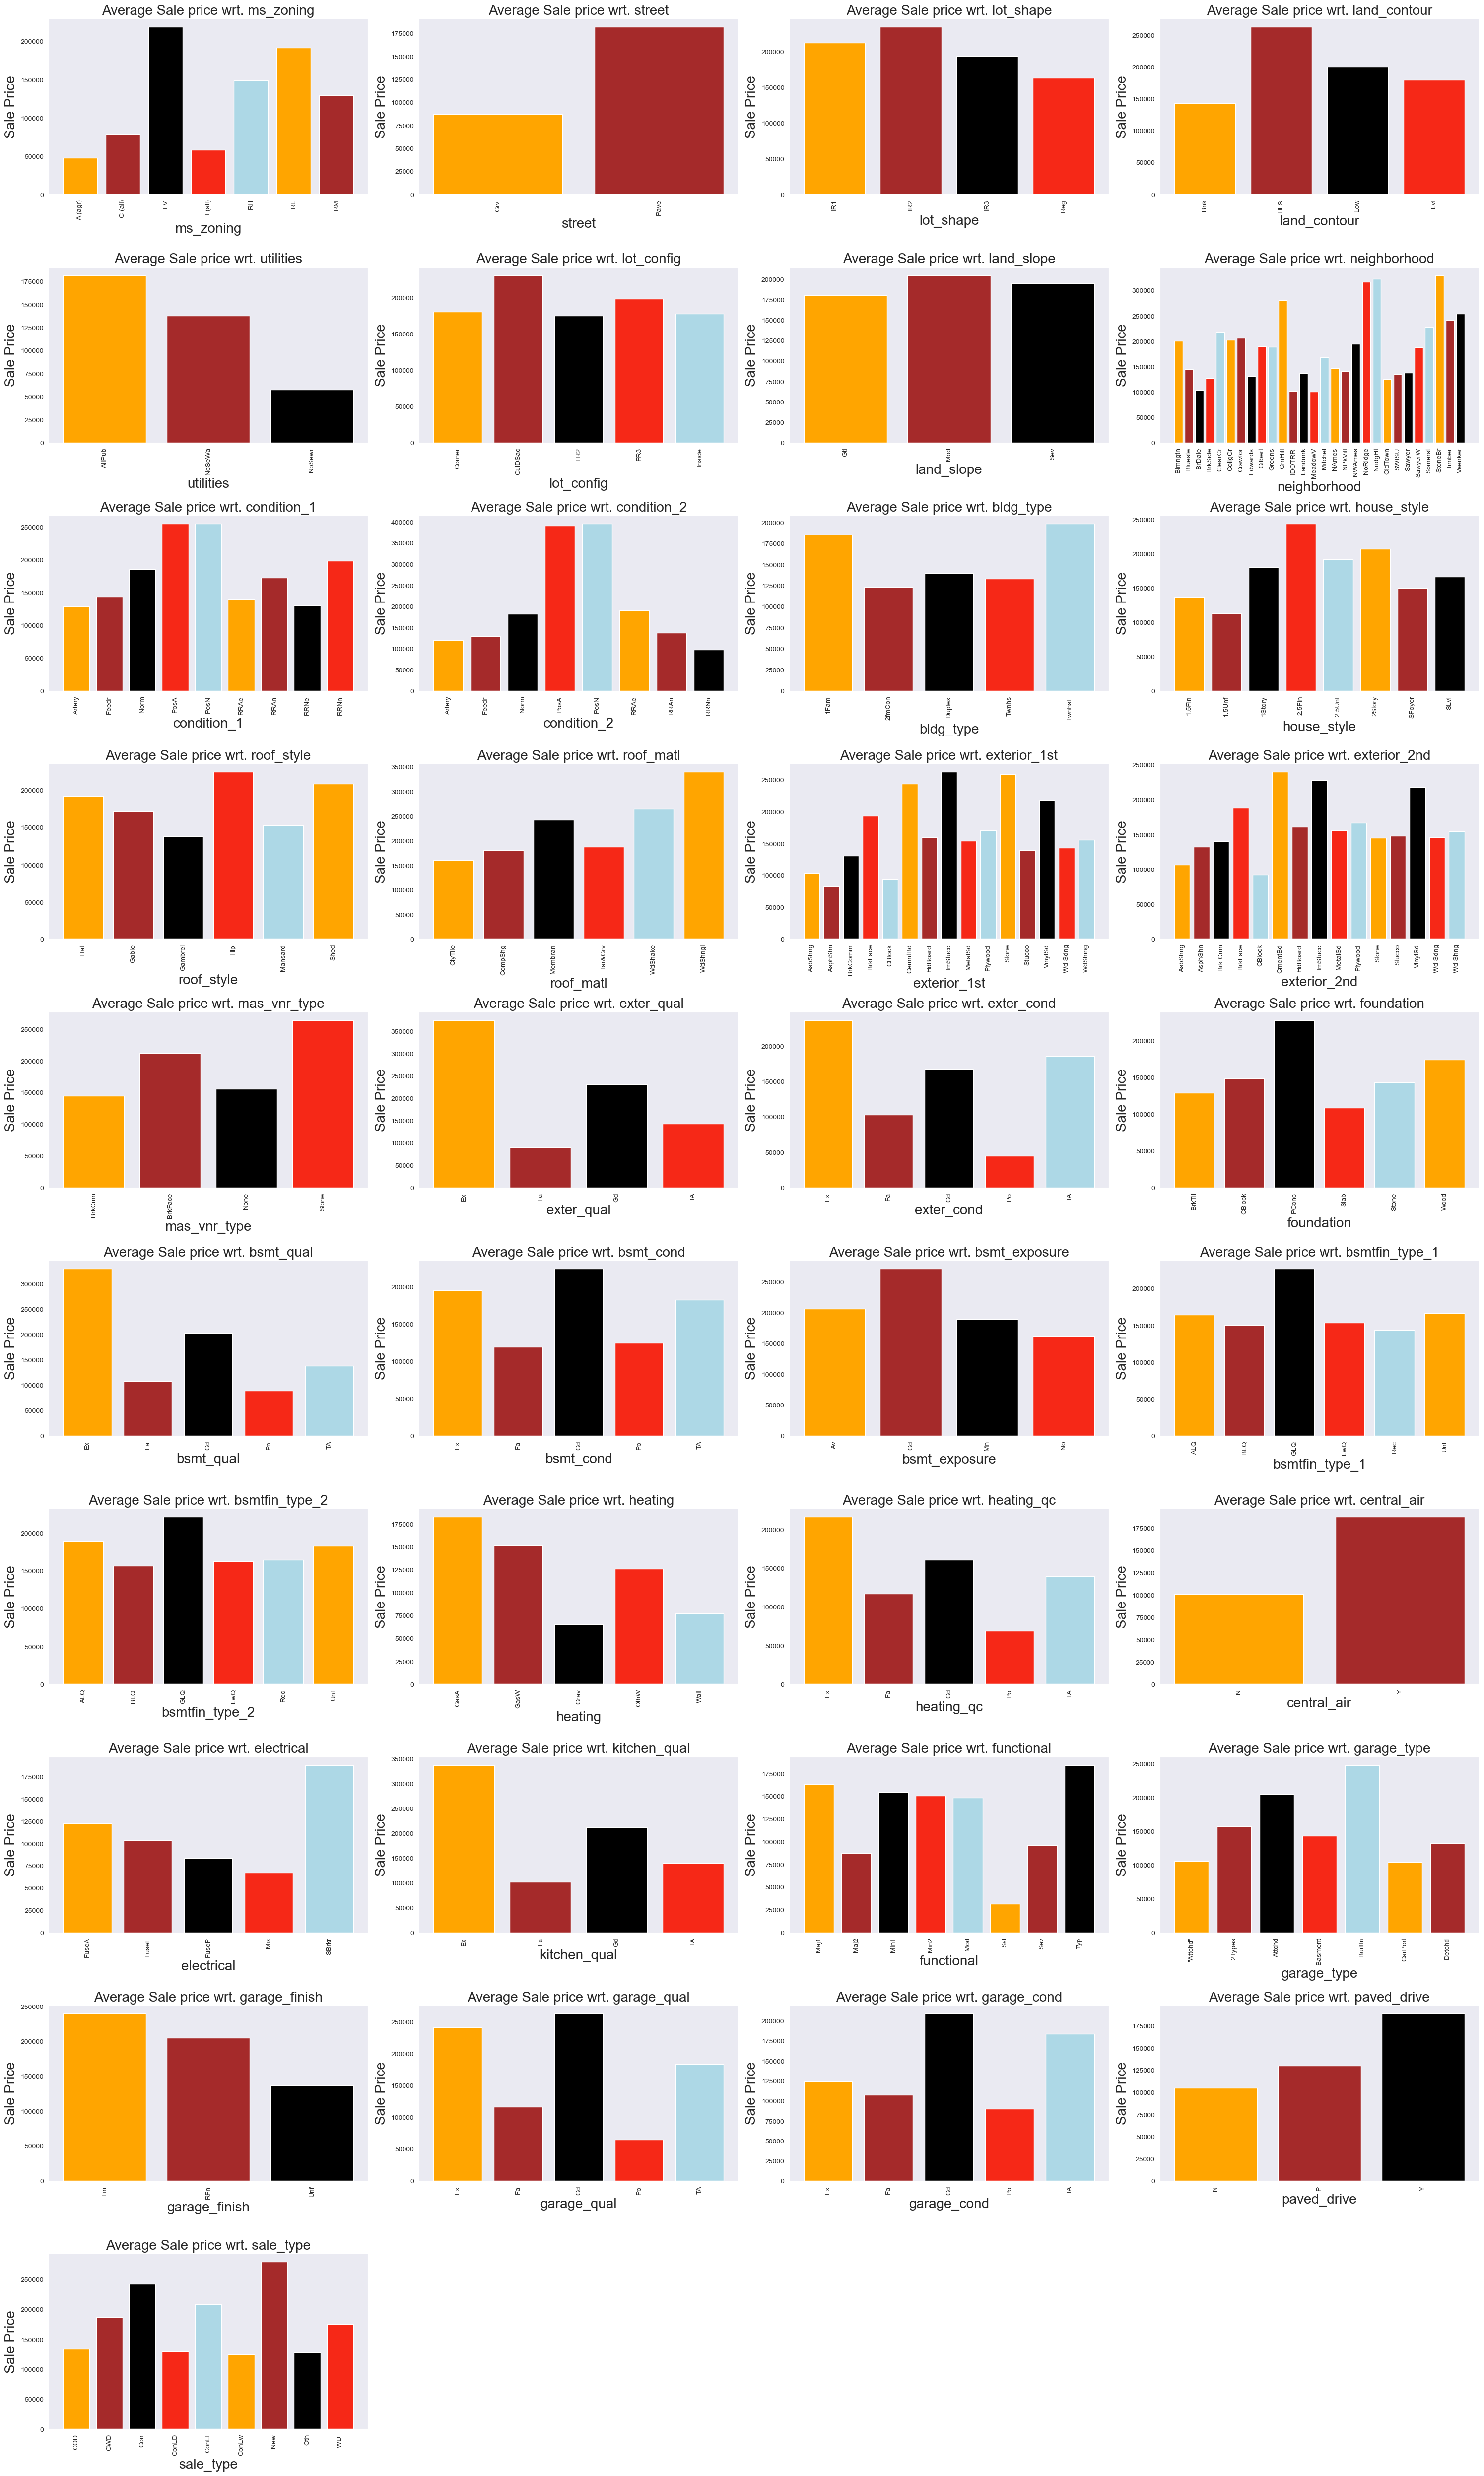

In [31]:
plt.figure(figsize = (30,50))

for index, col in enumerate(new_cols):
    plt.subplot(10,4, index + 1)
    plt.bar(df.groupby(col)['saleprice'].mean().index, df.groupby(col)['saleprice'].mean(),
                                                       color = ('orange', 'brown', 'black', '#F62817', 'lightblue'))
    plt.title("Average Sale price wrt. {}".format(col), fontsize = 20)
    plt.ylabel("Sale Price", fontsize = 20)
    plt.xlabel(col, fontsize = 20)
    plt.xticks(rotation = "vertical")
plt.tight_layout()

In [32]:
new_data = pd.concat([num_data, cat_data], axis = 1)
new_data.head(2)

ms_subclass  lot_frontage  lot_area  overall_qual  overall_cond  \
0           60          68.0     13517             6             8   
1           60          43.0     11492             7             5   

   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  ...  \
0        1976            2005         289.0         533.0           0.0  ...   
1        1996            1997         132.0         637.0           0.0  ...   

   central_air  electrical  kitchen_qual  functional  garage_type  \
0            Y       SBrkr            Gd         Typ       Attchd   
1            Y       SBrkr            Gd         Typ       Attchd   

   garage_finish  garage_qual  garage_cond  paved_drive  sale_type  
0            RFn           TA           TA            Y        WD   
1            RFn           TA           TA            Y        WD   

[2 rows x 74 columns]

In [33]:
new_data.to_csv('./datasets/new_data.csv')